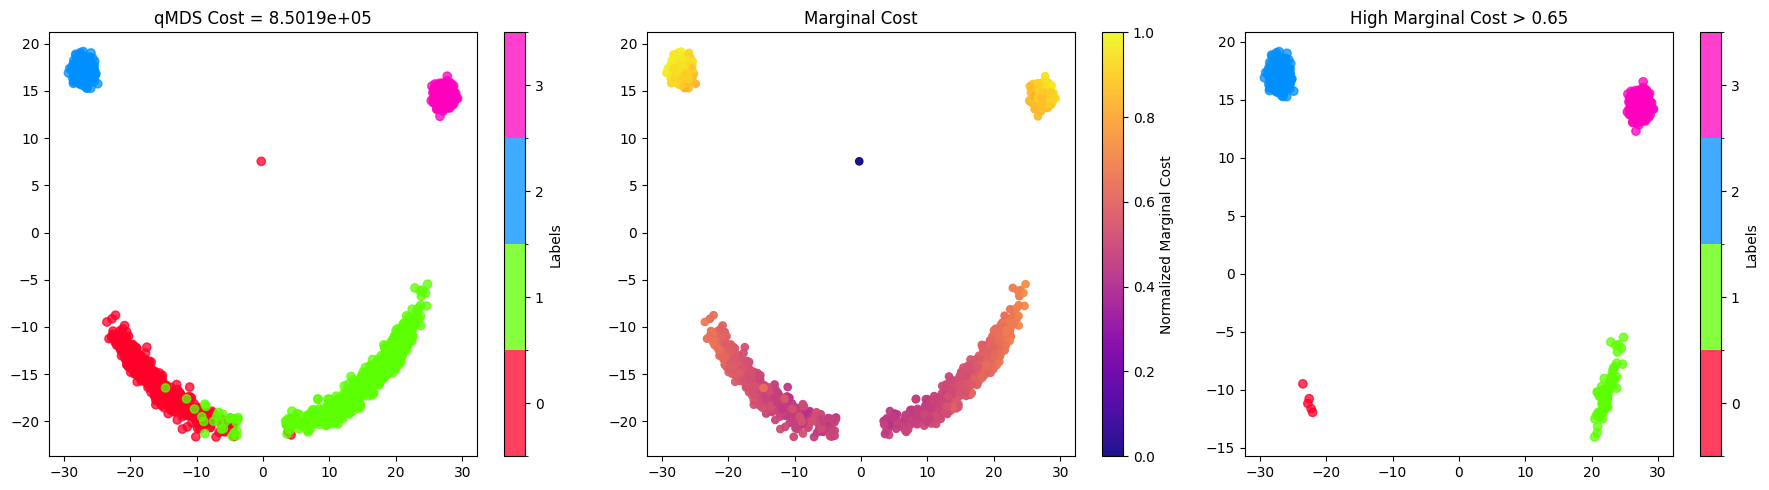

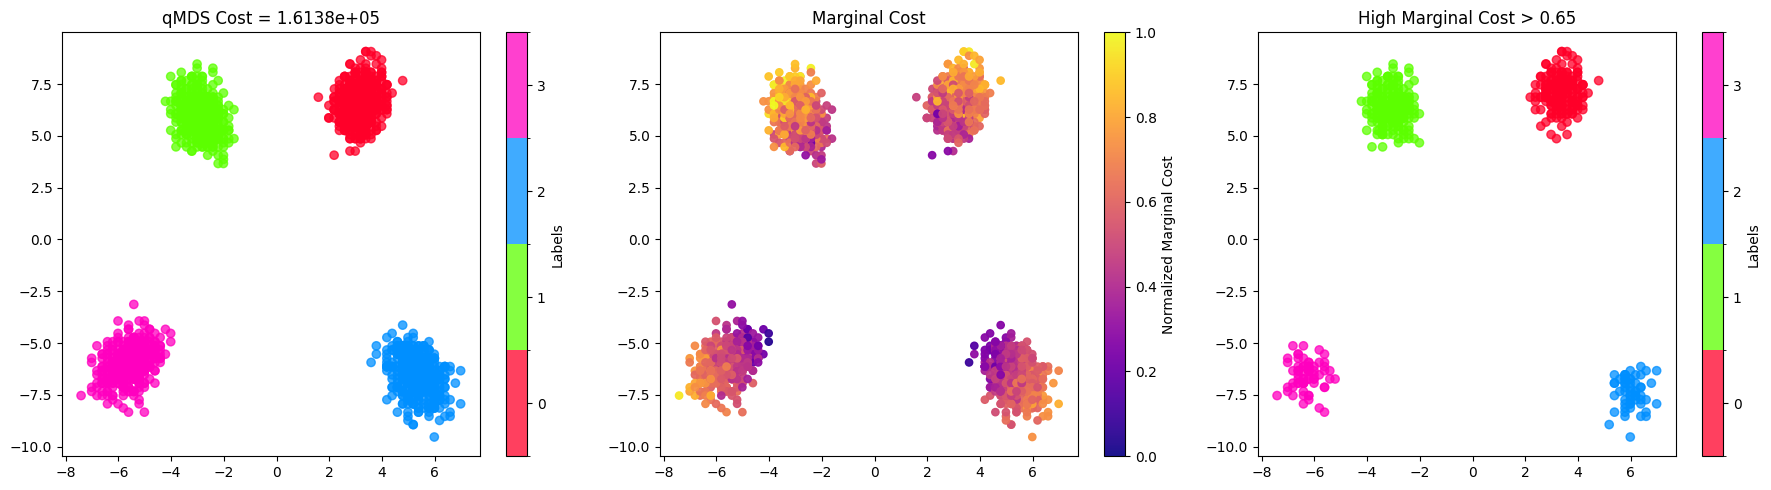

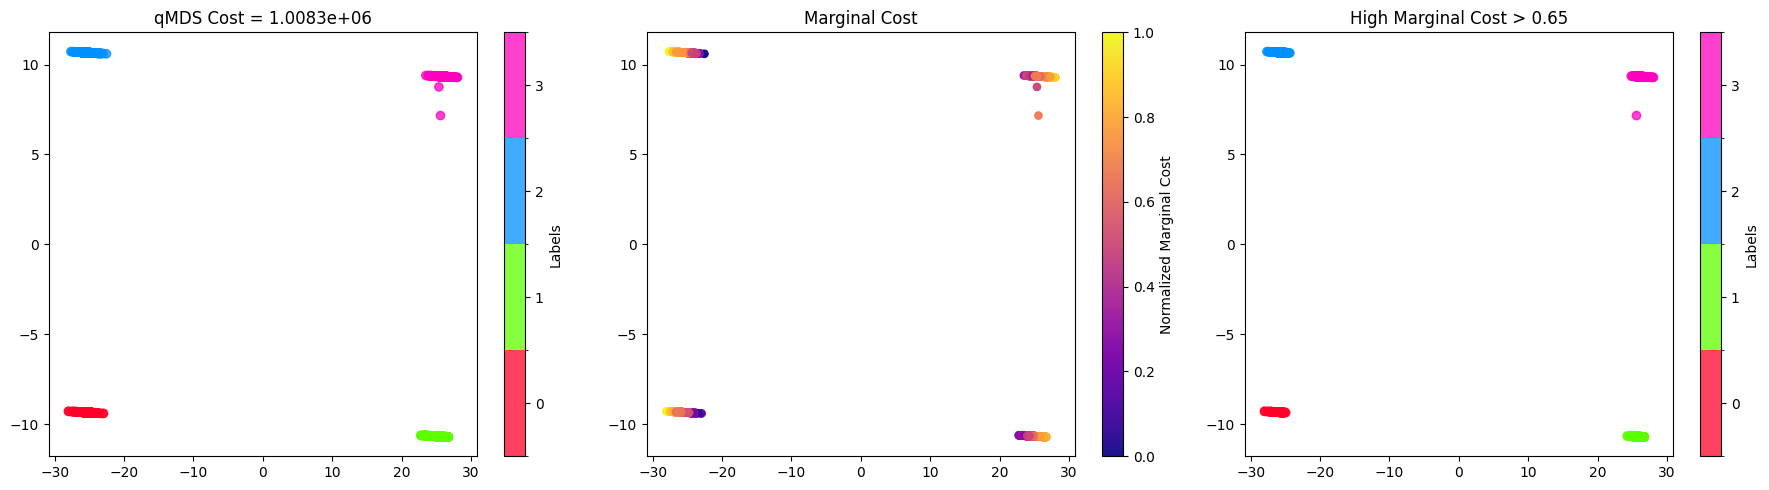

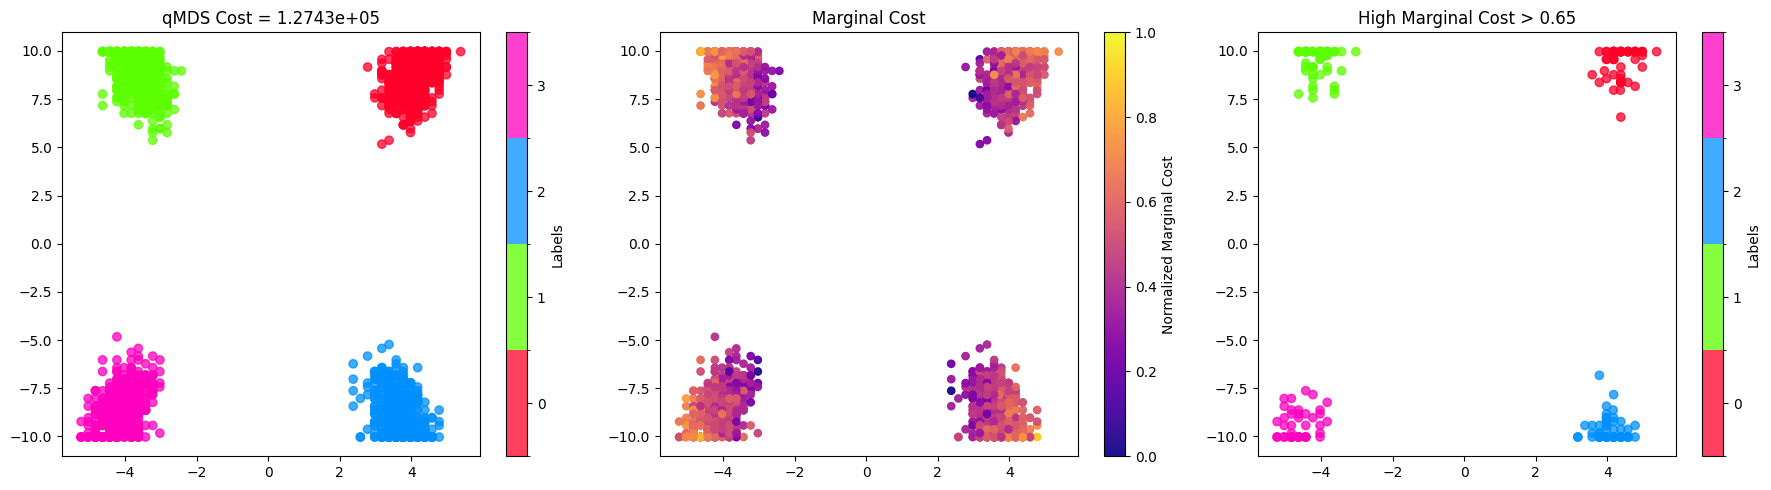

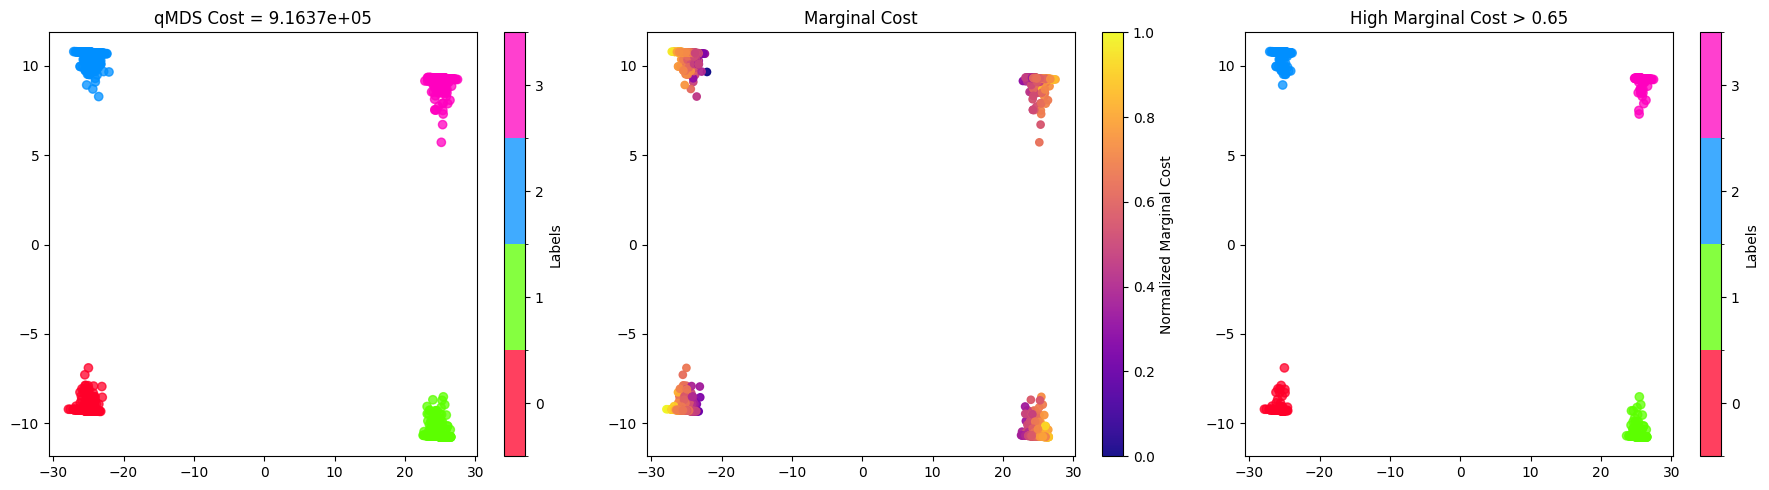

In [3]:
import _path_init
import numpy as np
from ndsolver.versions.default import MM

k = 4
distance = 20
means = [[distance, 0, 0, 0], [0, distance, 0, 0], [0, 0, distance, 0], [0, 0, 0, distance]]
covs = [np.eye(4)] * k


X = np.concatenate([np.random.multivariate_normal(means[i], covs[i], 500).T for i in range(k)], axis=1)
labels = np.concatenate([[i] * 500 for i in range(k)])

mm = MM(X, labels)
for i in range(5):
    mm.update(grad_threshold=1)
    mm.visualize()

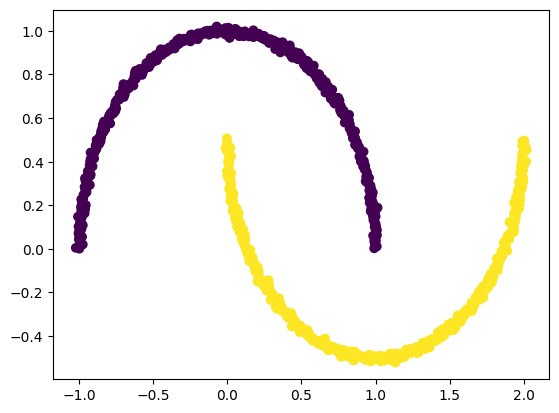

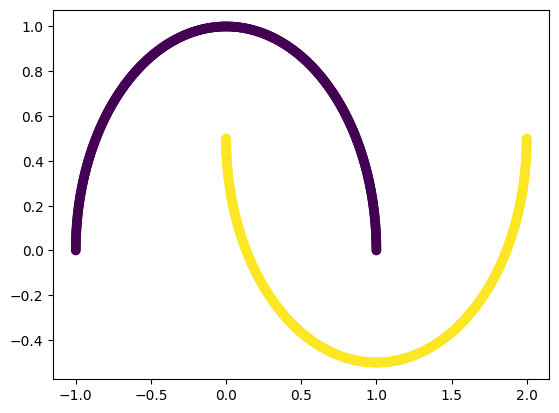

[[-0.06291948 -0.02975134 -0.00467599 ...  0.08542867  0.00728742
  -0.02246563]
 [ 0.0413961   0.00828487  0.00256891 ... -0.00553866 -0.00168439
  -0.00320975]]


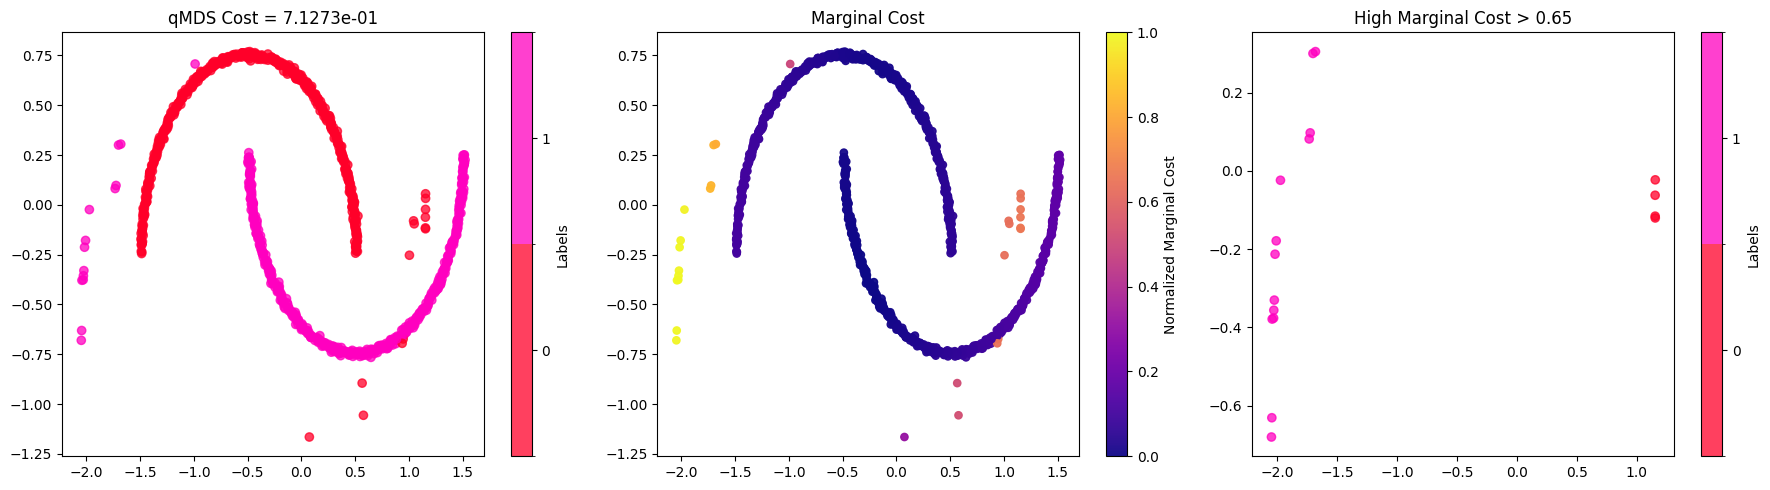

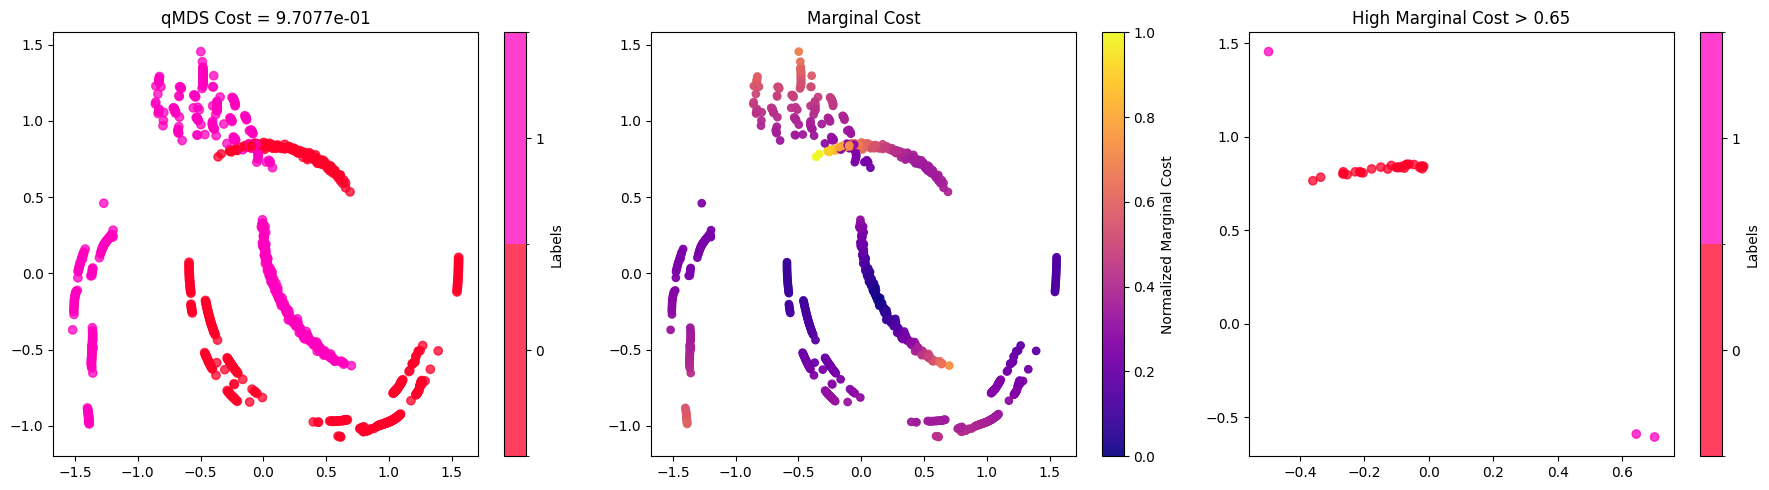

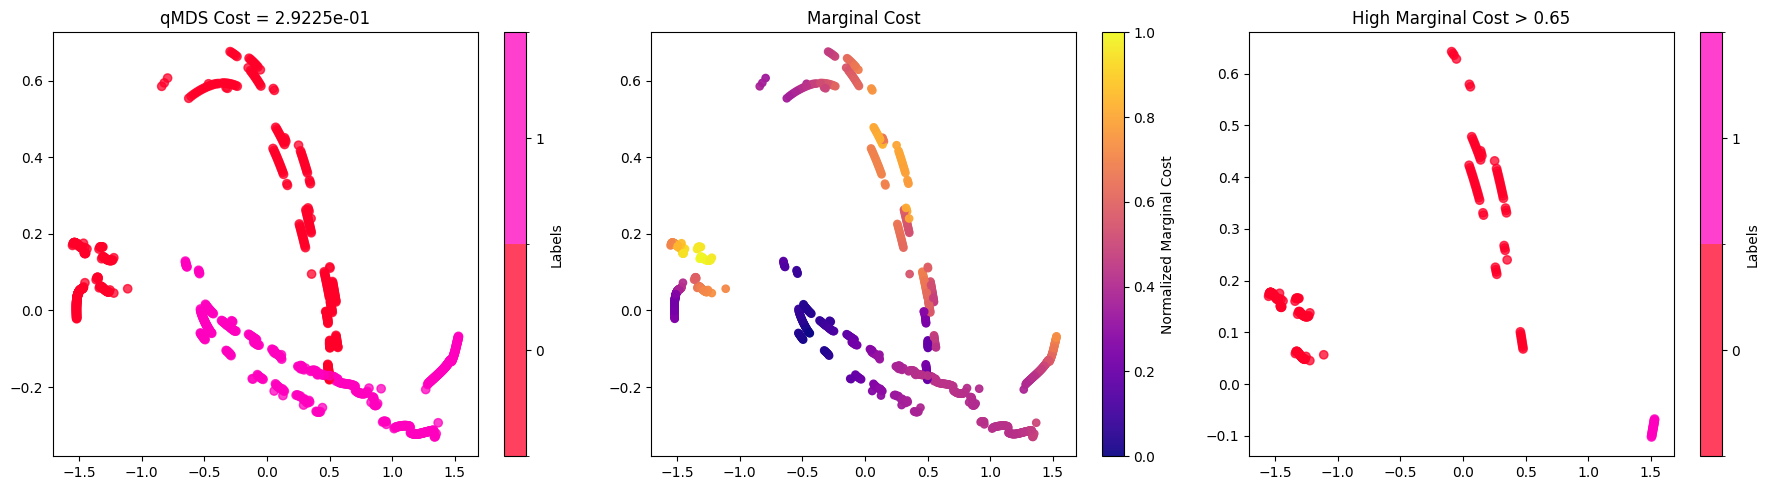

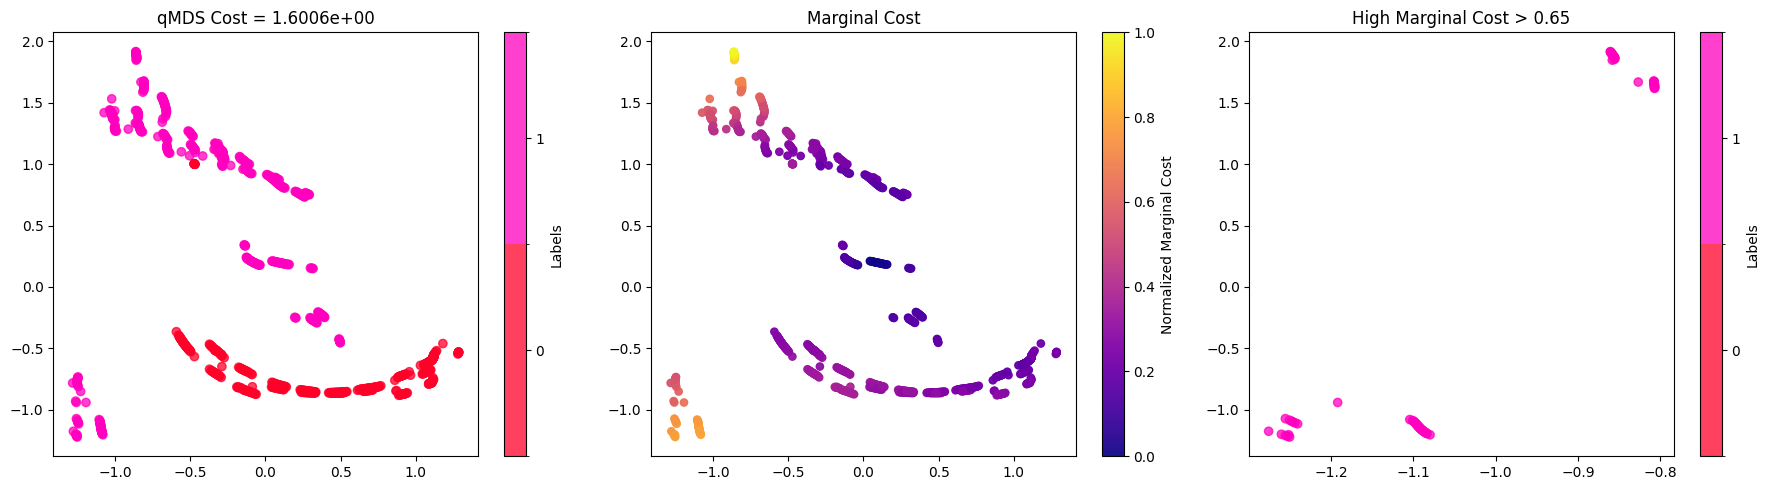

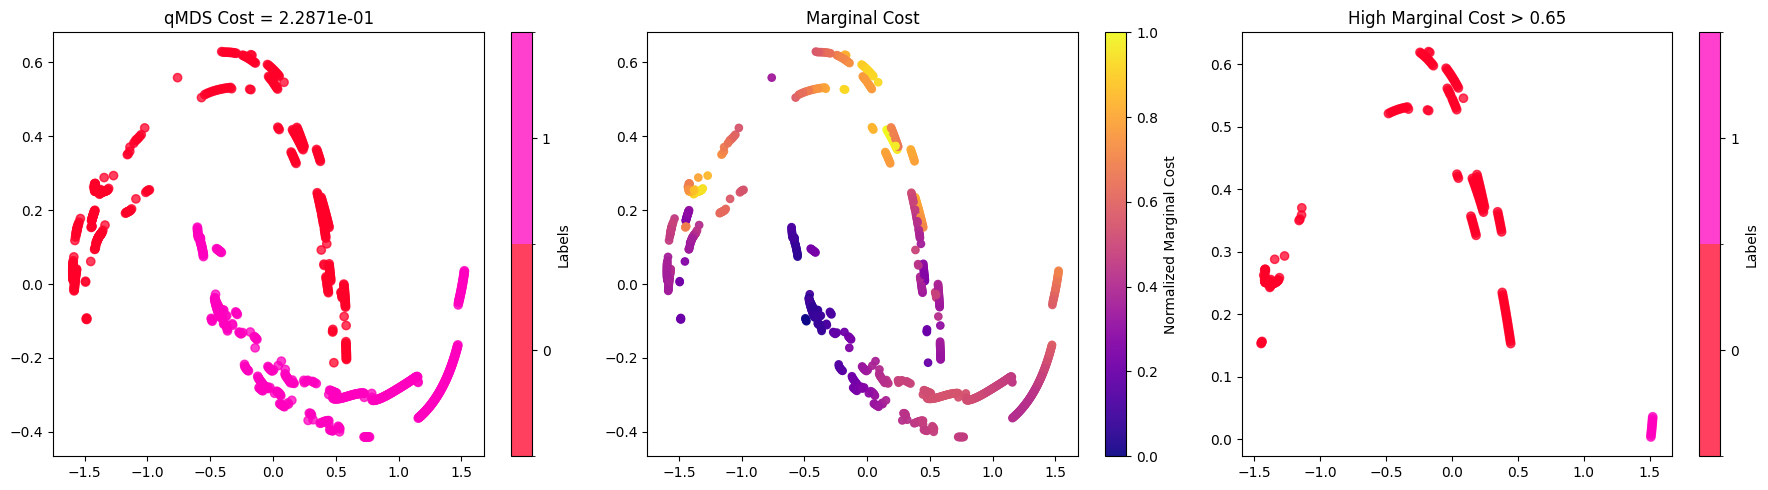

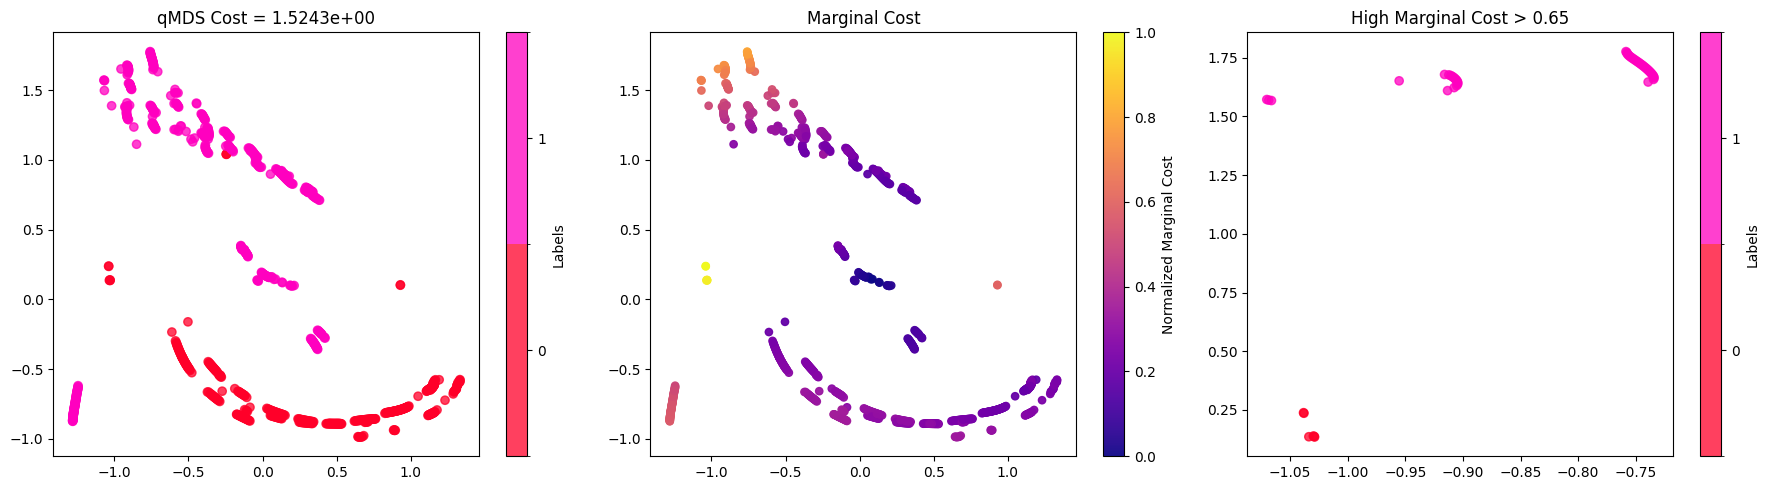

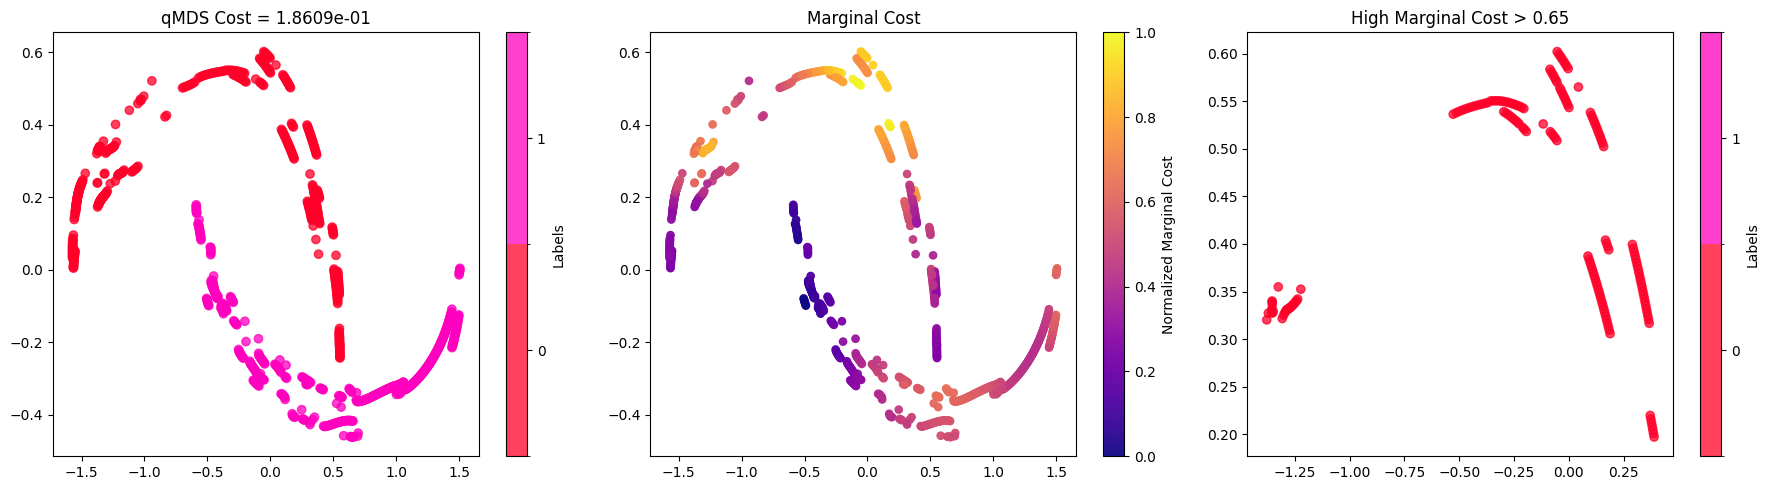

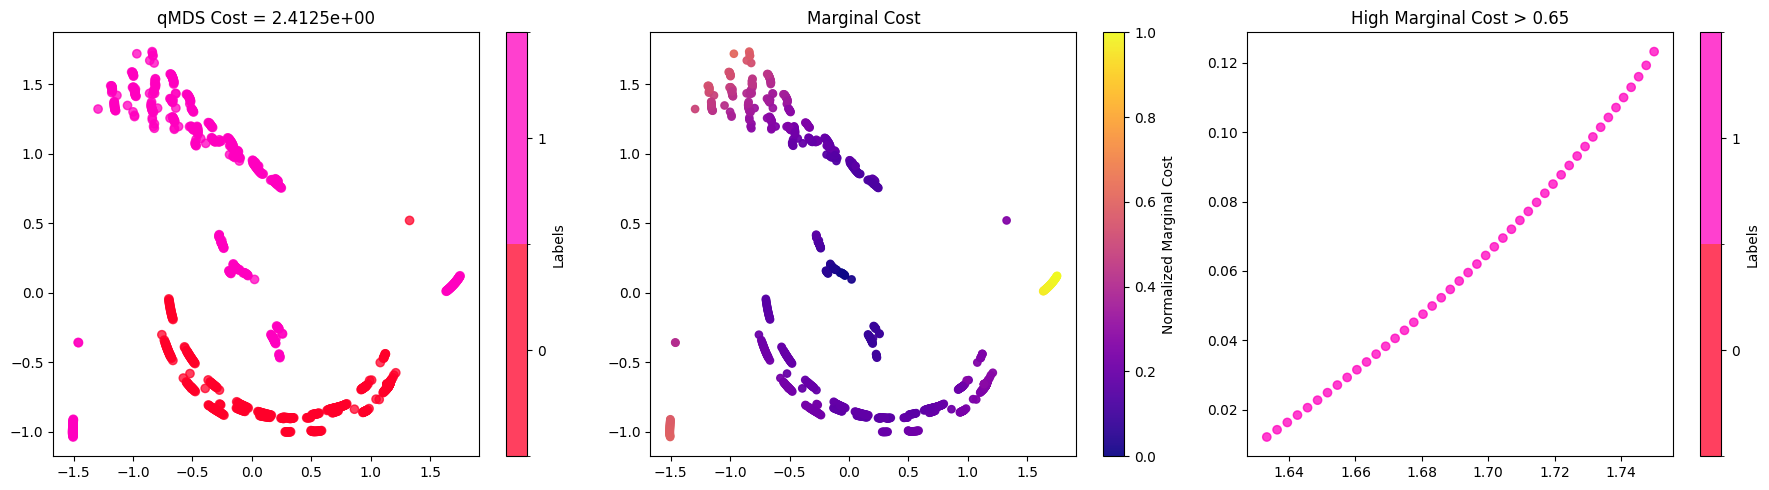

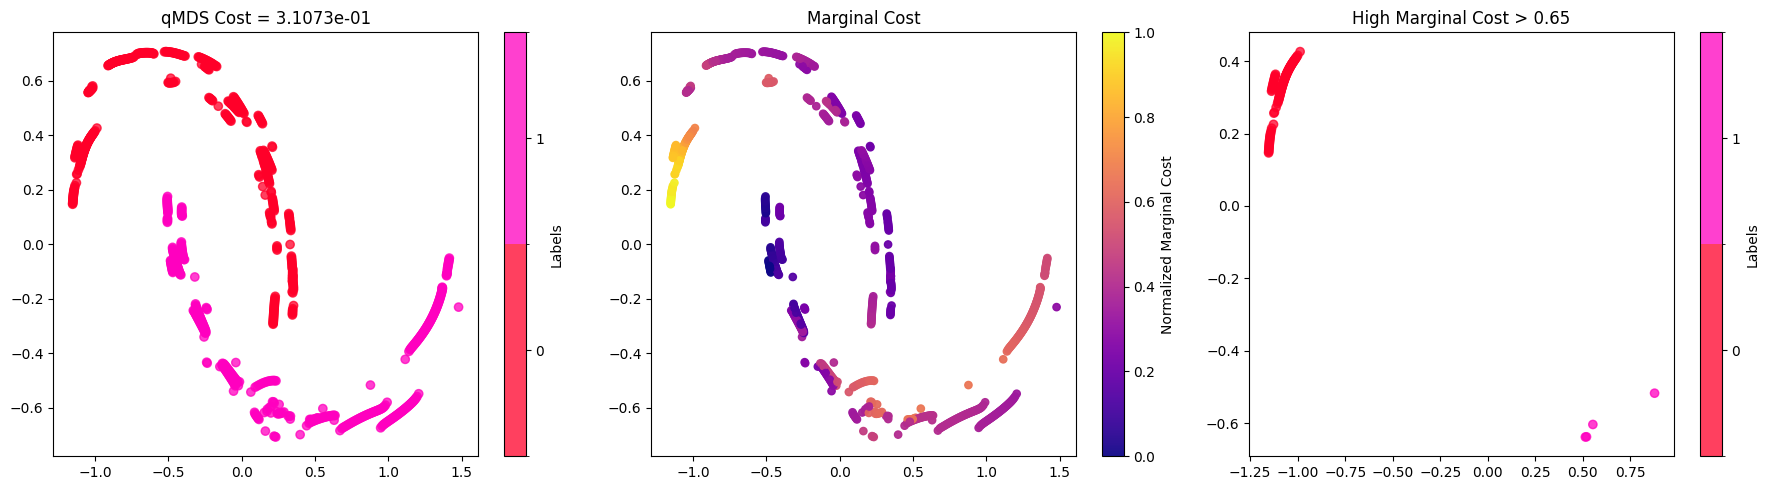

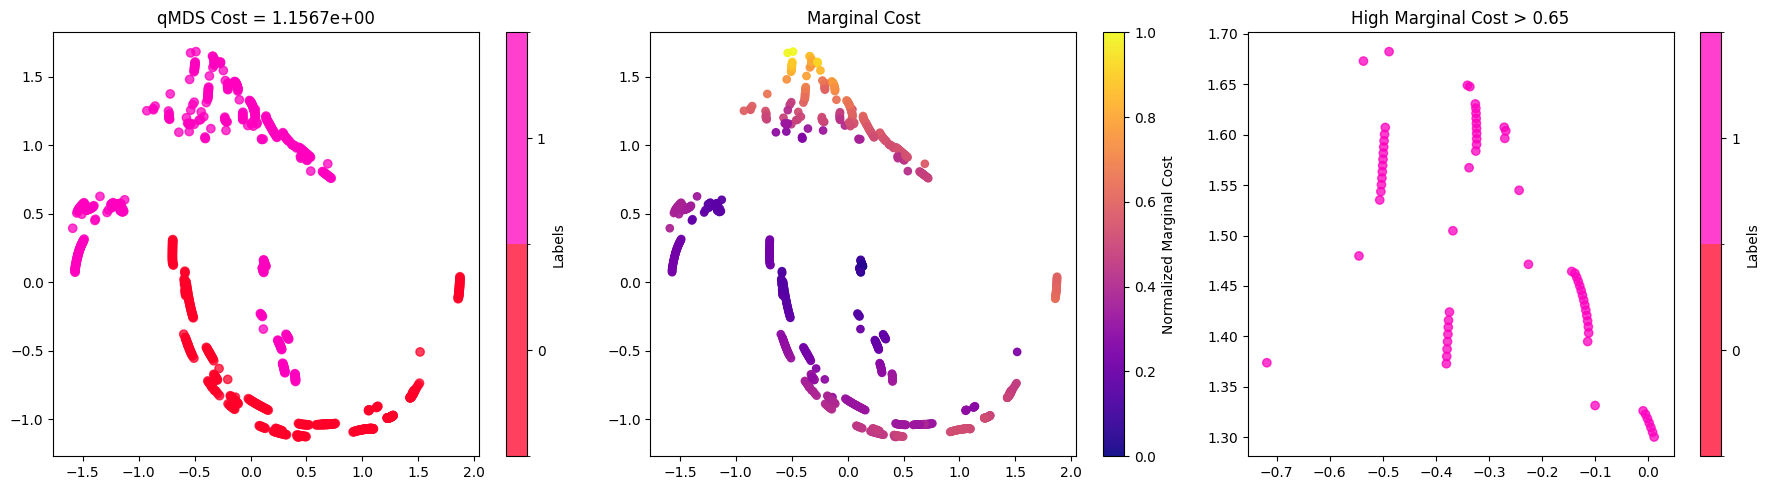

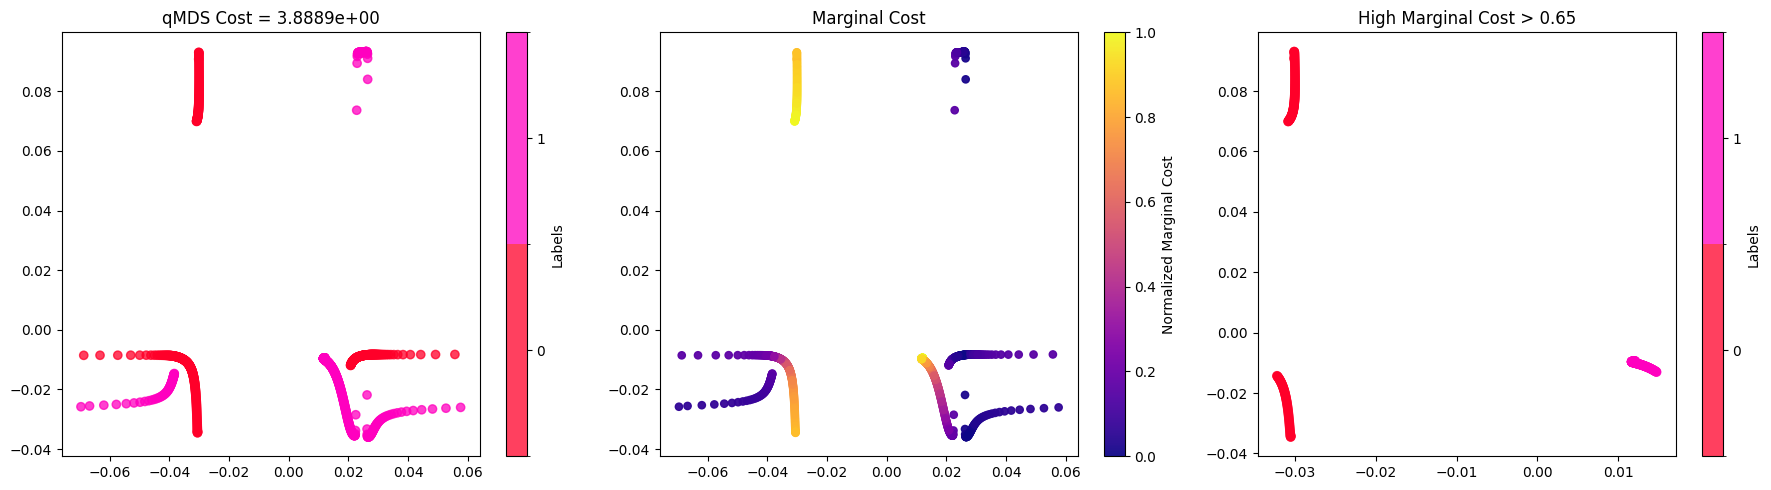

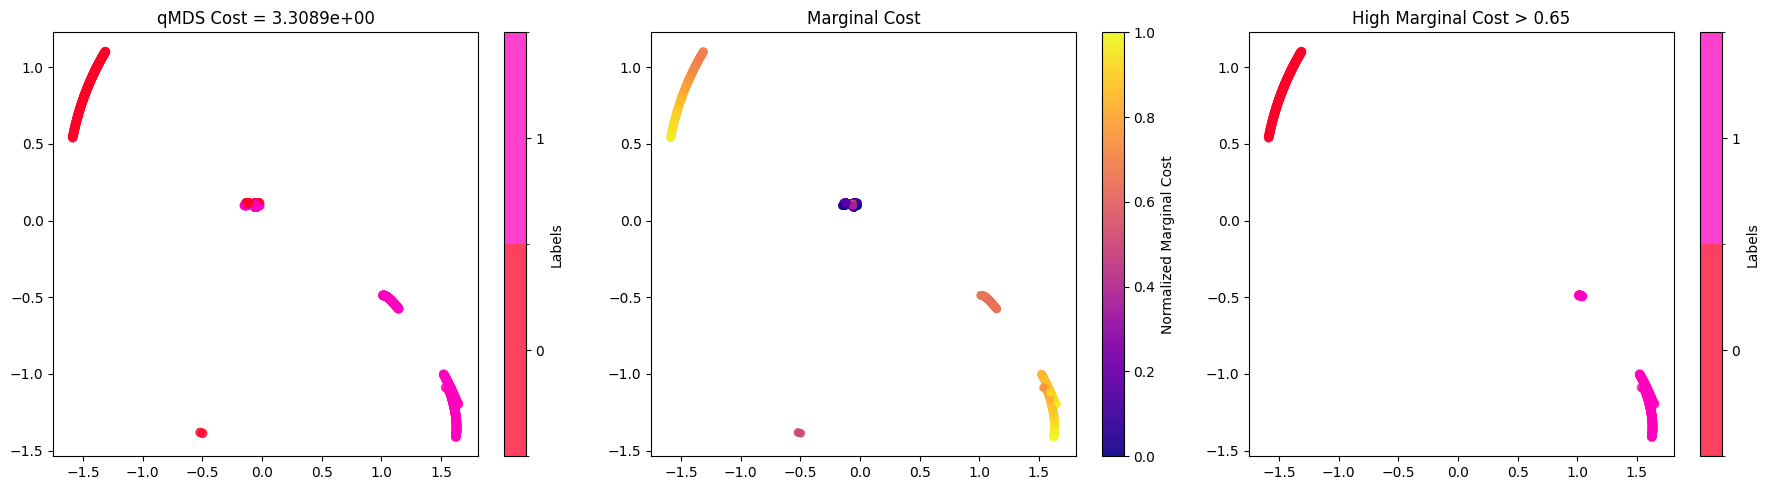

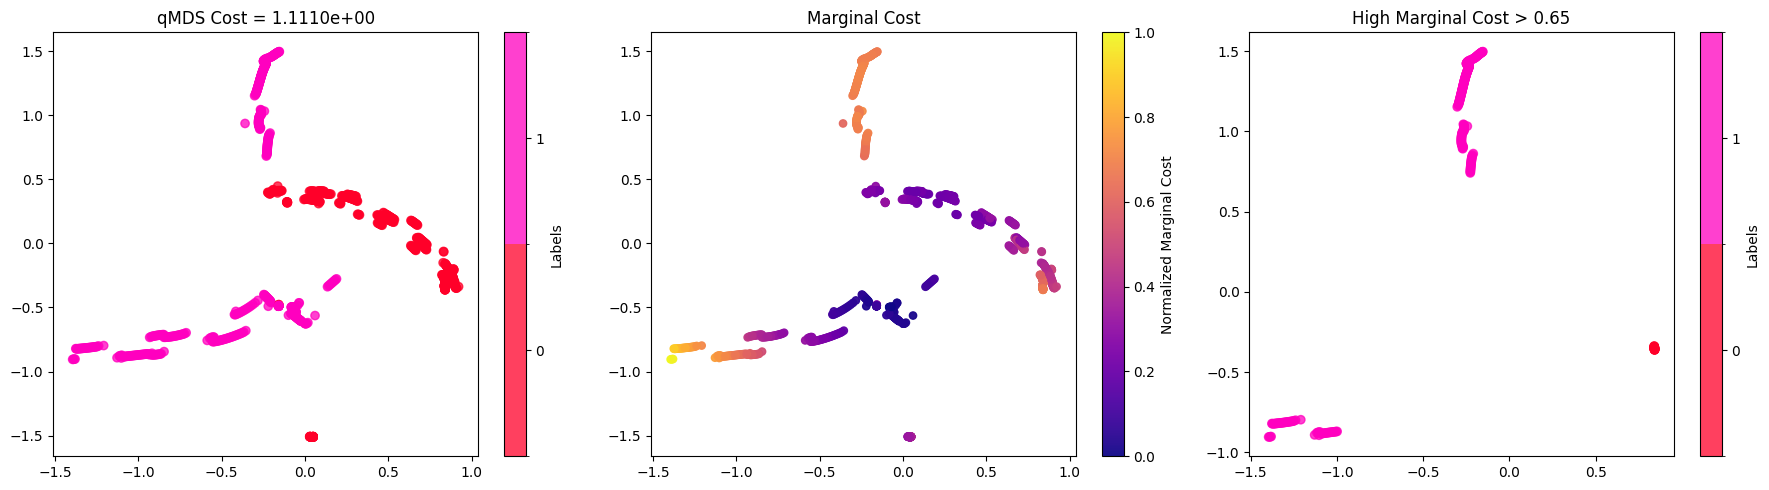

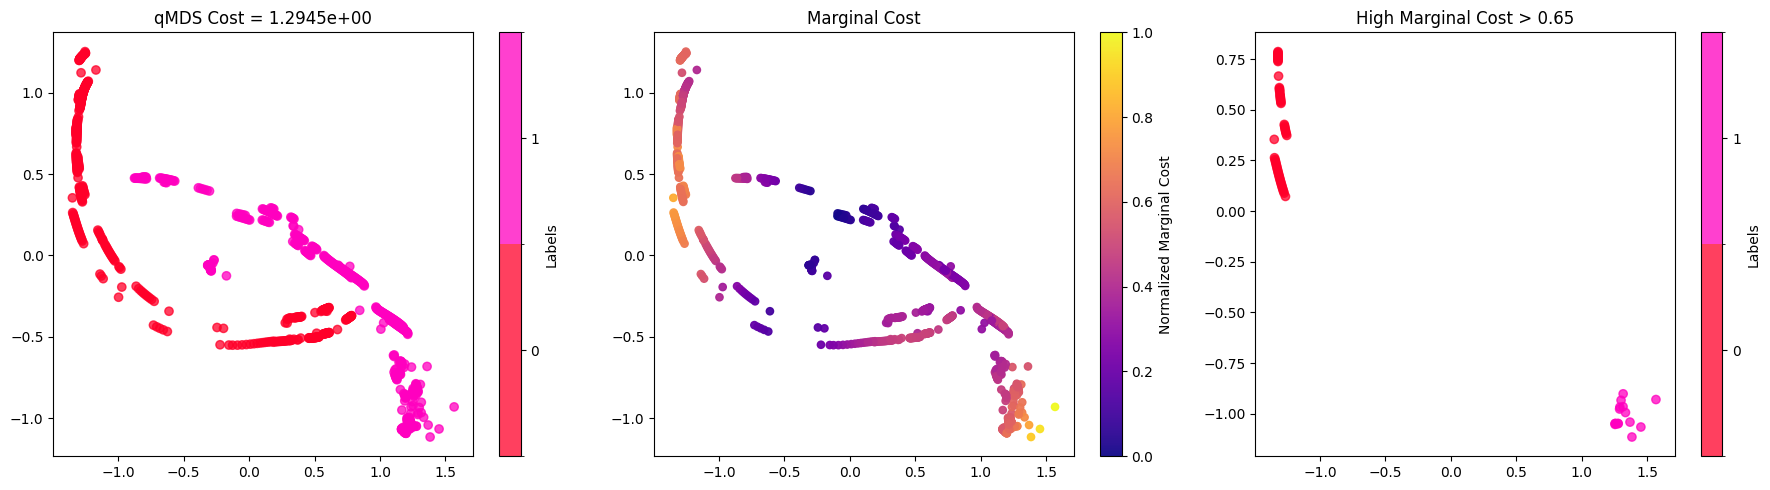

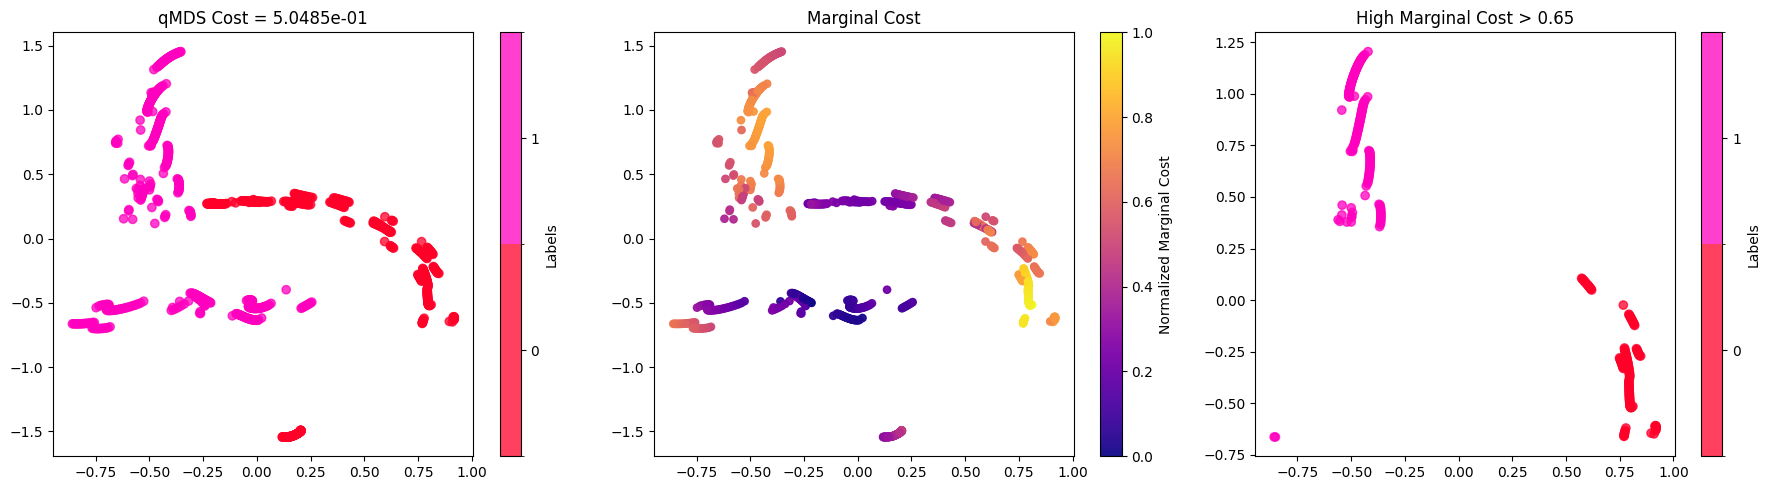

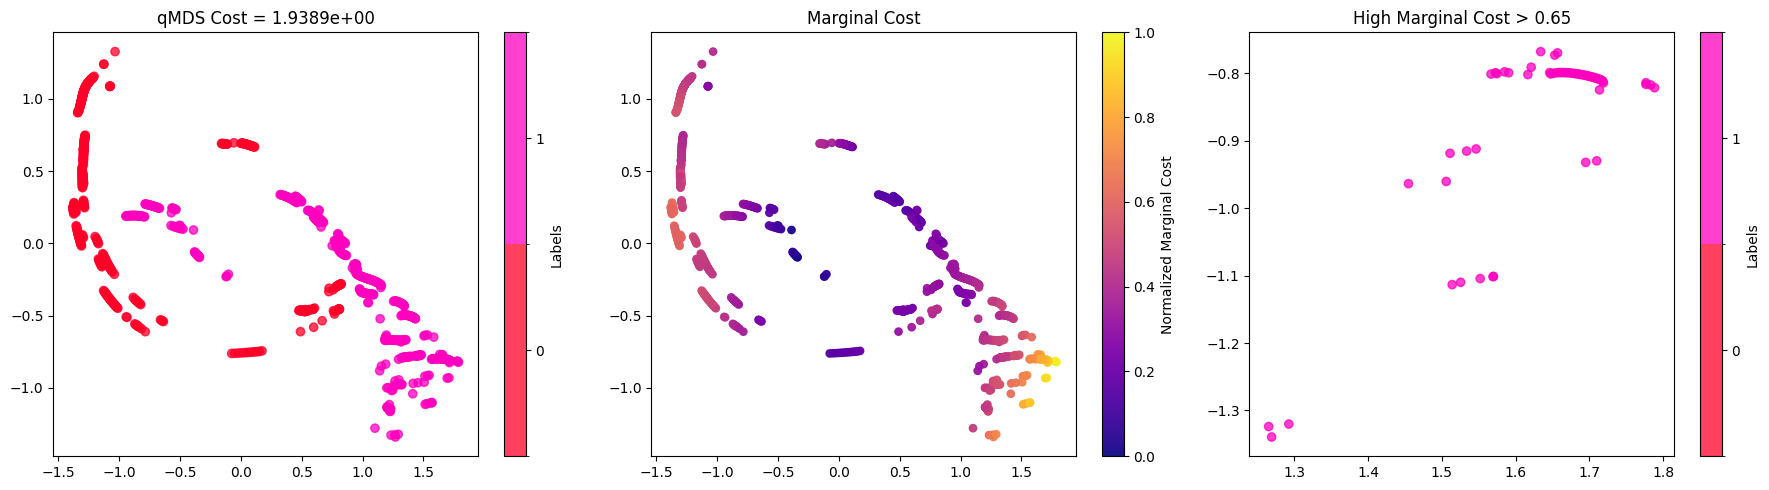

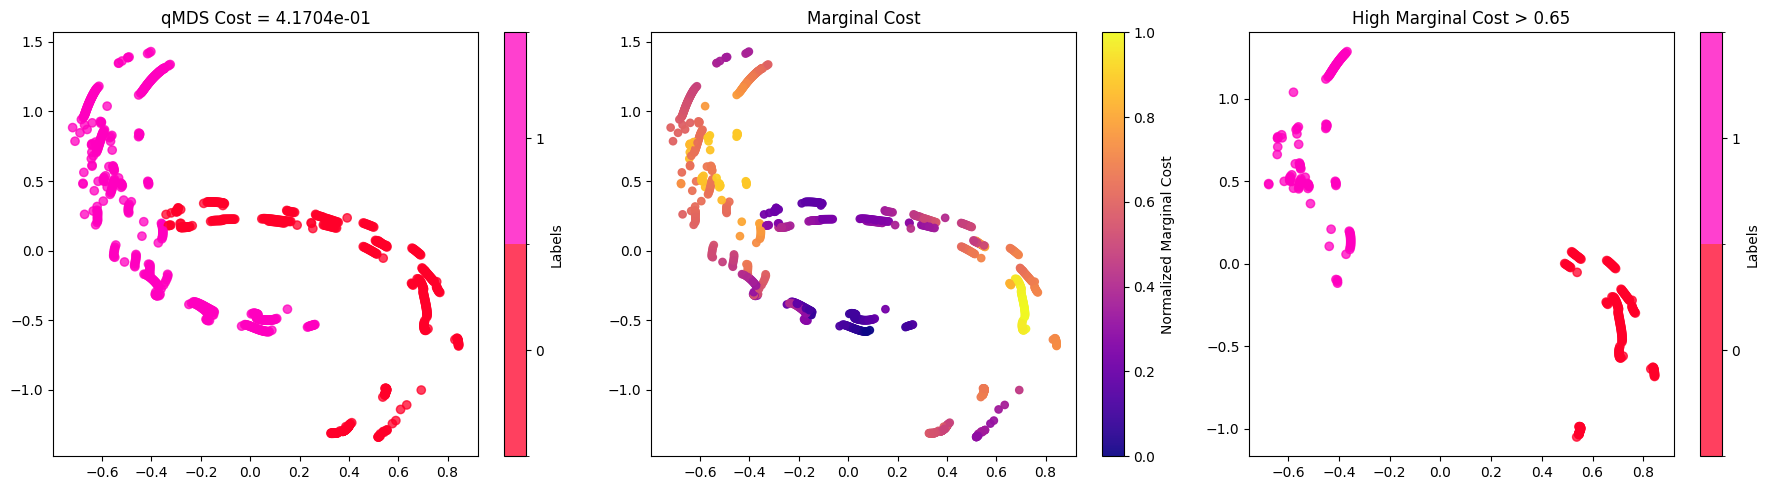

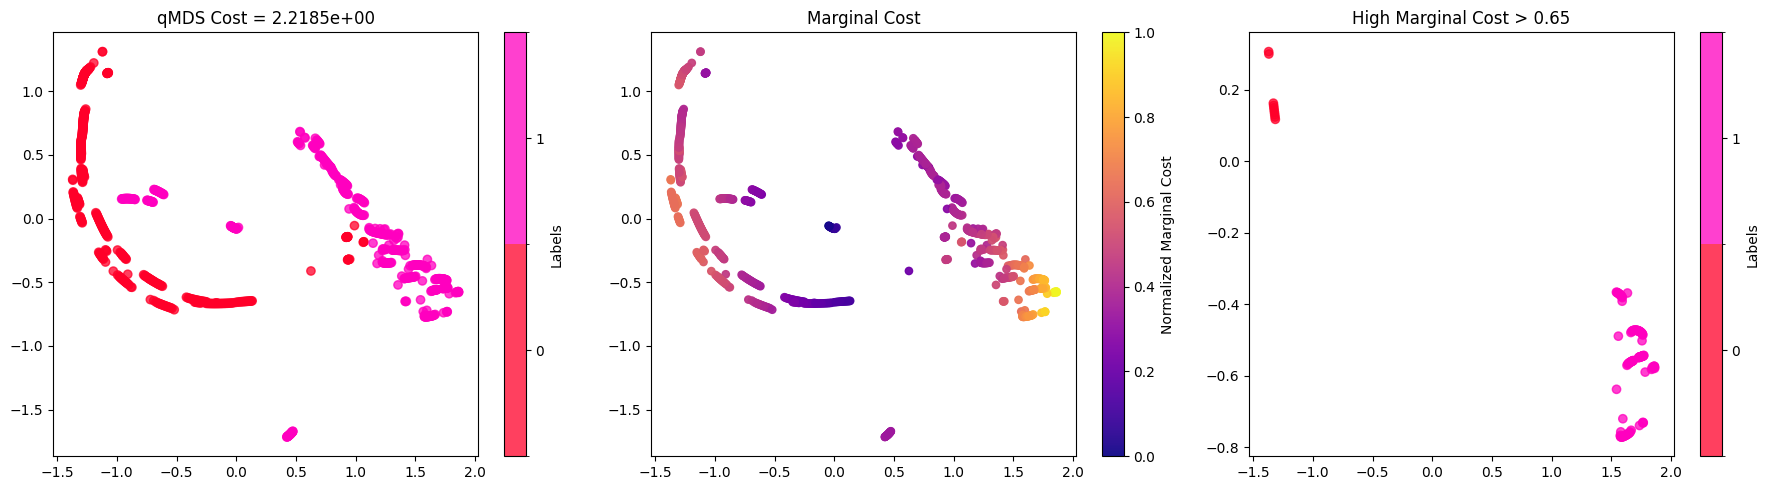

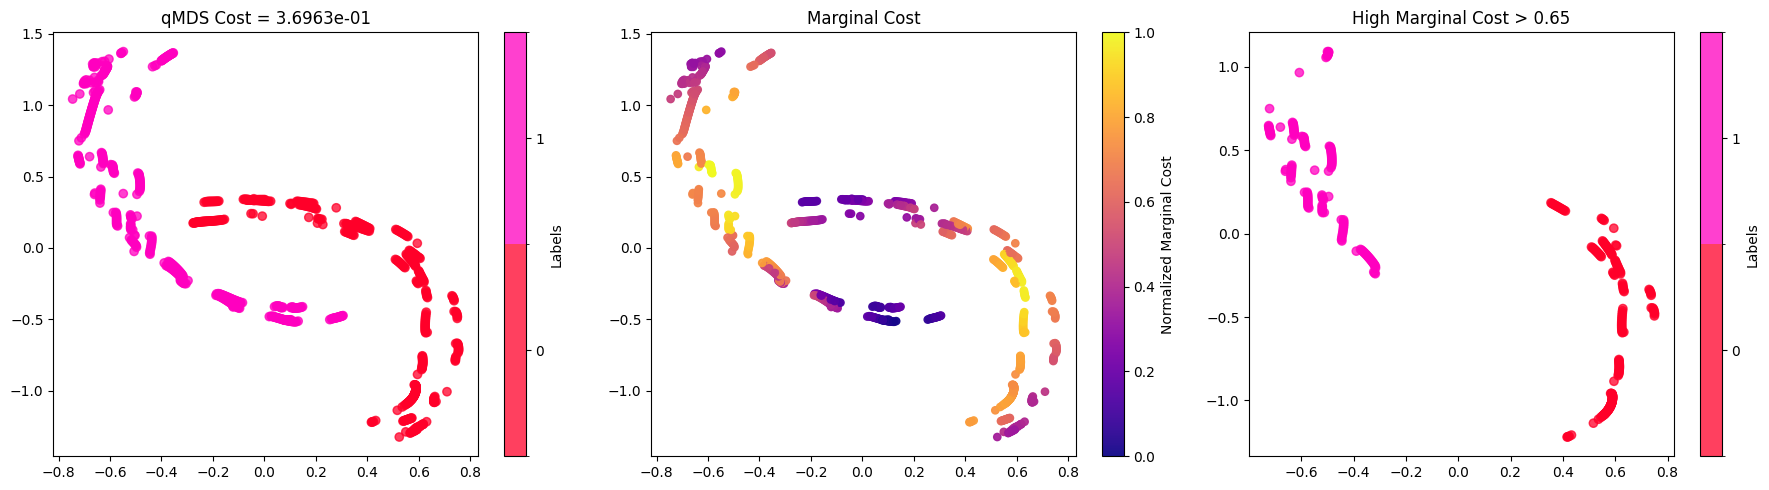

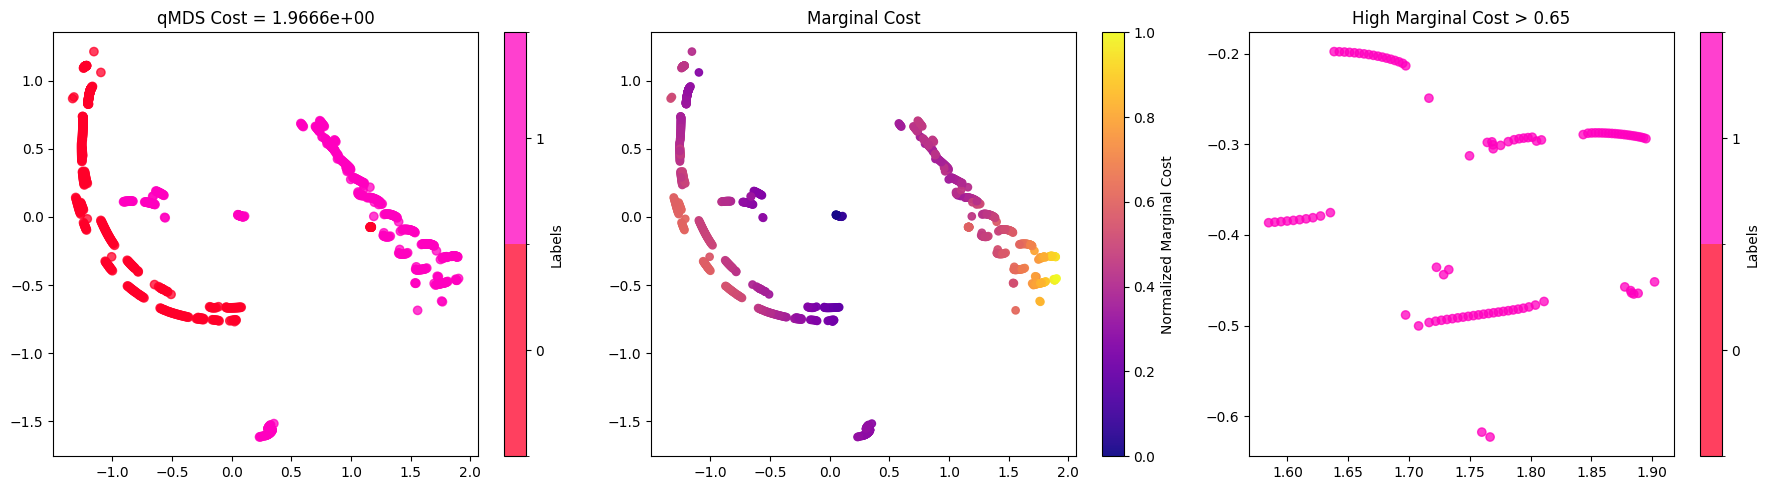

AttributeError: 'MM' object has no attribute 'calculate_grad'

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

n = 1000
X, y = make_moons(n_samples=n, noise=0)
X = X.T

noisy = X + np.random.randn(2, n) * 0.01

plt.scatter(*noisy, c=y)
plt.show()

plt.scatter(*X, c=y)
plt.show()

# print(MM(X, y).cost(X))
print(MM(X, y).grad(noisy))
# print(MM(X, y, init=X).eigenvalues())
# print()


mm = MM(X, y, init=noisy)
for _ in range(10):
    mm.update(threshold=.1)
    mm.visualize()
    
    
mm = MM(X, y, init=None, init_scaling_factor=2)
for _ in range(10):
    mm.update(threshold=.1)
    mm.visualize()
mm.grad(mm.Y)